No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


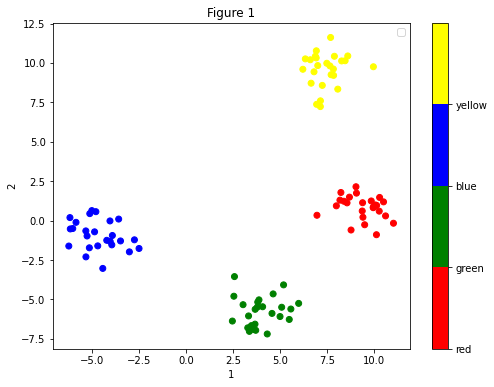

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import random as rd
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=100, n_features=4, centers=4, random_state=4)

colors = ['red', 'green', 'blue', 'yellow']

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], (X[:,1]), c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Figure 1")
plt.xlabel("1")
plt.ylabel("2")
# plt.legend(['a','b','c'])
loc = np.arange(0,max(y))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)
plt.legend()
plt.show()

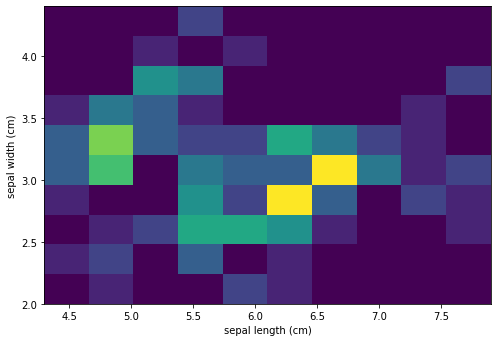

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# feature_names = [
#         "sepal length (cm)",
#         "sepal width (cm)",
#         "petal length (cm)",
#         "petal width (cm)",
#     ]


plt.figure(figsize=(8, 6))
# plt.scatter(X[:,0], (X[:,1]), c=y, alpha=0.5, s=200)
# # plt.show()
# plt.hist(X[:,3], bins=20)
# plt.hist(X[:,2], bins=20)
# plt.hist(X[:,1], bins=20)
plt.hist2d(X[:,0],X[:,1])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.imshow(np.corrcoef(X.T))


array([-6.73789955])

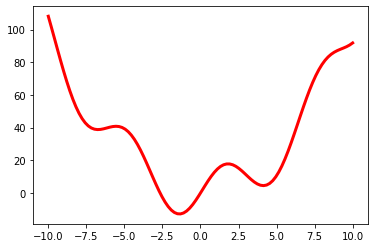

In [4]:
from scipy import optimize

def f(x):
    return x**2 + 15*np.sin(x)

x = np.linspace(-10, 10, 100)
plt.plot(x, f(x) ,c="red", lw=3)

# search Minimize value
optimize.minimize(f, x0=-8).x

In [5]:
350 + 1000 + 90 + 80 + 45 + 200 + 130 + 900 + 200 + 60

3055

In [6]:
# Basics pandas

import pandas as pd

df = pd.read_excel("../dataset/titanic3.xls")
df = df.drop(['name', 'sibsp', 'parch', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'ticket', 'fare'], axis=1)

df.head()
df.info()
df.isnull().sum()
df.corr()
df.dtypes
df.dropna(axis=0, inplace=True)
df['pclass'].value_counts()
# df.set_index('name')
df.groupby(['sex', 'pclass']).mean()
# df.iloc[0:2, 0:2]
df.loc[0:2]['sex'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 41.0+ KB


0    female
1      male
2    female
Name: sex, dtype: object

<AxesSubplot:xlabel='Date'>

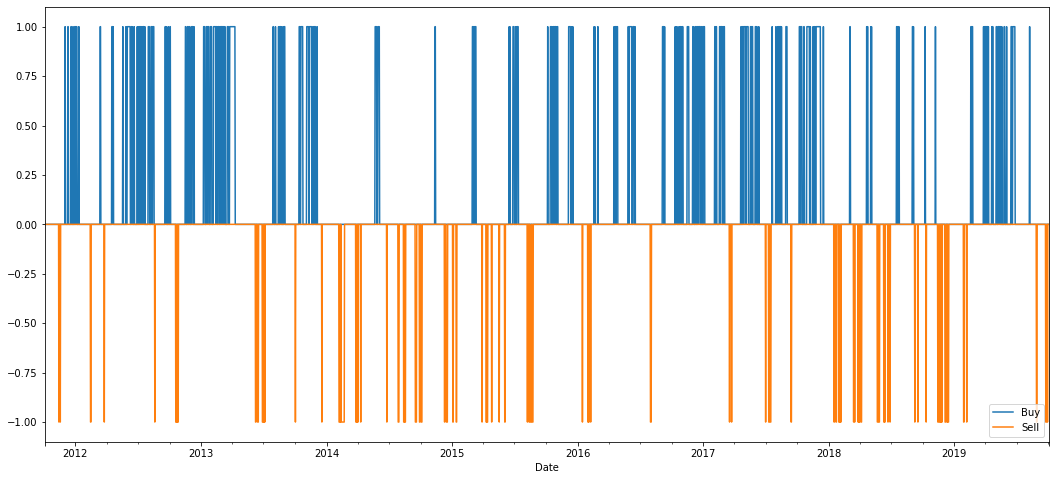

In [7]:
# Time series

import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../dataset/Bitcoin.csv", index_col="Date", parse_dates=True)
ETH = pd.read_csv("../dataset/Eth.csv", index_col="Date", parse_dates=True)

# df = pd.merge(ETH, BTC, on="Date", how="inner", suffixes=('_ETH', '_BTC'))

# df['2019-09']['Close'].plot(figsize=(10,6))
# df.loc['2019', 'Close'].resample('2W').agg(['mean', 'min', 'max', 'std']).plot(figsize=(10,6), lw=3)

# ===> Methods 
# resample
# rolling
# evm (exp weighted average)
# Asfreq

# tempMajCity[datedeb:'2015'].groupby(['City'])['temp'].plot(figsize=(18, 8))
# tempMajCity[tempMajCity['City'] == 'Toronto'][datedeb:'2015']['temp'].rolling(window=7, center=True).mean().plot(label='moving average Toronto', lw=2, ls='--')
# df[['Close_ETH', 'Close_BTC']].plot(subplots=True, figsize=(18, 8))

# df['Close'].rolling(window=28, center=True).aggregate(['min', 'max']).plot(figsize=(18, 8))
df['Buy'] = np.zeros(len(df))
df['Sell'] = np.zeros(len(df))
df['MAX'] = df['Close'].shift(1).rolling(window=28).max()
df['MIN'] = df['Close'].shift(1).rolling(window=28).min()

df.loc[(df['MAX'] < df['Close'], 'Buy')] = 1
df.loc[(df['MIN'] > df['Close'], 'Sell')] = -1

df[['Buy', 'Sell']].plot(figsize=(18, 8))

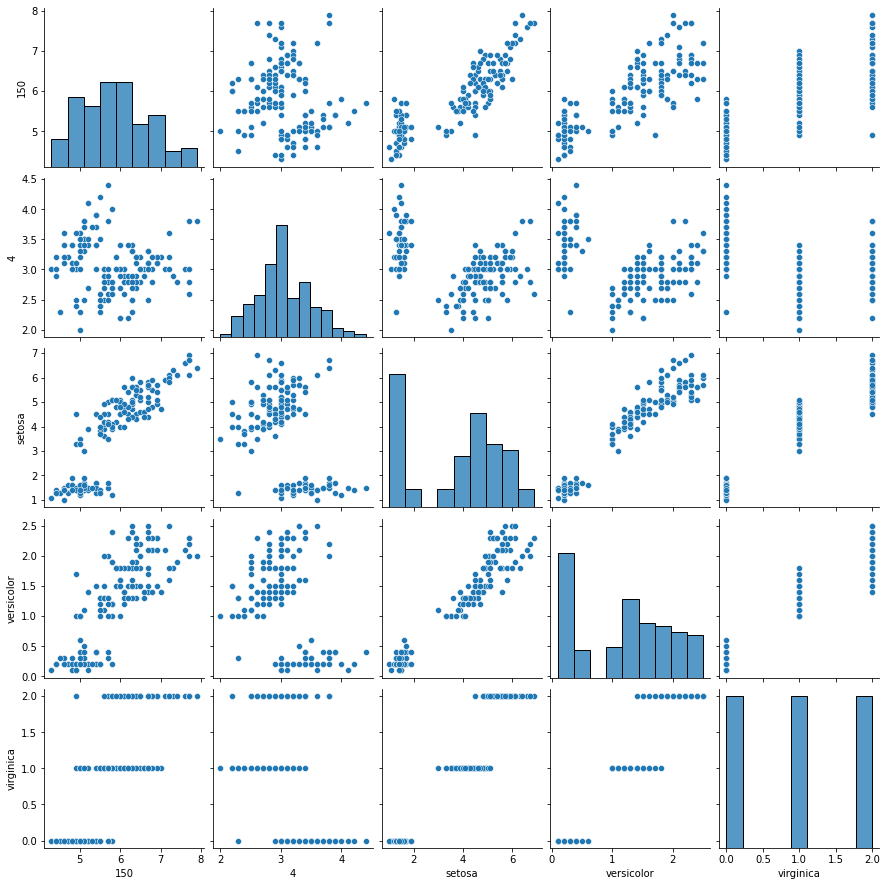

In [8]:
# Seaborn

from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target

df = pd.read_csv('../dataset/iris.csv')

sns.pairplot(df)

# READ DOCUMENTATION

/home/titi/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


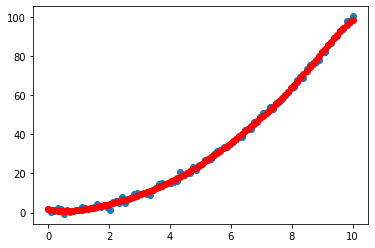

In [9]:
# SKLEARN Linear regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

np.random.seed(0)

m  = 100
X = np.linspace(0, 10, m).reshape(m,1)
y = X**2 + np.random.randn(m, 1)

plt.scatter(X, y)

model = SVR(C=100)
model.fit(X, y)
model.score(X, y)
p = model.predict(X)

plt.scatter(X,p,c="r")

In [10]:
# KNN

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_excel("../dataset/titanic3.xls")
df = df[['survived', 'pclass', 'sex', 'age']]
df.dropna(axis=0, inplace=True)
df['sex'].replace(['male', 'female'], [0,1], inplace=True)
df.head()

model = KNeighborsClassifier(n_neighbors=3) # 0 - 10 max

y = df['survived']
X = df.drop('survived', axis=1)

model.fit(X, y)
model.score(X,y)
# pclass, sex, age
p = np.array([3,1,26]).reshape(1,3)
model.predict(p)
model.predict_proba(p)

/home/titi/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/titi/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.66666667, 0.33333333]])

11 13 6 0


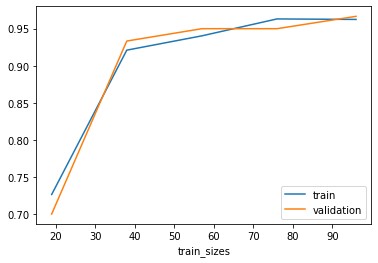

In [12]:
# CROSS VALIDATION & VALIDATION CURVE & GRID SEARCH CV

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, check_scoring, classification_report
import numpy as np


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

# cross_val_score(KNeighborsClassifier(10), X_train, y_train, cv=5, scoring='accuracy').mean()

# We can change the scoring to F1 for example

model = KNeighborsClassifier()
k = np.arange(1, 50)

# train_scores, valid_scores = validation_curve(
#      model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=5)

# plt.plot(k, valid_scores.mean(axis=1))
# plt.plot(k, train_scores.mean(axis=1))

param_grid = {'n_neighbors' : np.arange(1, 50), 'metric' : ['euclidean', 'manhattan'] }

# We can change the scoring to F1 for example scoring=
grid = GridSearchCV(model, param_grid, cv=5)

grid.fit(X_train, y_train)
model = grid.best_estimator_

y_pred = grid.predict(X_test)
model.score(X_test, y_test) 

# Thus in binary classification, the count of true negatives is C[0][0], false negatives is C[1][0], true positives is  C[1][1] and false positives is C[0][1]
confusion_matrix(y_test, model.predict(X_test))


# PARAMETERS 

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 5),cv= 5)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

check_scoring(model)

hist = np.abs(y_test - y_pred)

print((y_pred == 0).sum(), (y_pred == 1).sum(), (y_pred == 2).sum() ,(y_pred == 3).sum())

# POUR LES REGRESSIONS VOIR LES ERREURS

# print('MAE', mean_absolute_error(y, y_pred)) # POUR VOIR LES ERREURS 
# print('MSE', mean_squared_error(y, y_pred)) # POUR VOIR LES ERREURS 
# print('RMSE', np.sqrt(mean_squared_error(y, y_pred))) # POUR VOIR LES ERREURS 
# print('MEDIANE ABSOLUTE ERROR', median_absolute_error(y, y_pred)) # POUR VOIR LES ERREURS 

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, 
# scoring='f1', train_sizes=np.linspace(0.1,1,10))
# print(val_score.mean())


In [ ]:
# Custom metrics

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def custom_metrics(y, y_pred):
    return np.sum((y_pred < y + y*0.2) & (y_pred > y - y_pred*0.2))/y.size

custom_score = make_scorer(custom_metrics, greater_is_better=True)

cross_val_score(LinearRegression(), X, y , c=3, scoring=custom_score)

In [34]:
# Pre processing

# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler

y = np.array([['fdfdfd', 'cat', 'fish'], ['dog', 'fdfdfd', 'fish']])
encoder = LabelEncoder() # Only shape x,1
# encoder = OrdinalEncoder() # shape X,X
# encoder.fit_transform(y)

encoder = OneHotEncoder()
X = encoder.fit_transform(y)

# Encodage 
# Normalization
# Polynomial (Créer des bariables en plus pour meilleur pretiction)
# Linear transform (Faciliter les données linéaire)
# Discrétisation (decouper variable continue en category )

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

model = make_pipeline(PolynomialFeatures(), StandardScaler(), KNeighborsClassifier())
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Feature selection

# Use variance for feature selection 
# Pour lutter contre l'over fiting

from sklearn.feature_selection import VarianceThreshold 
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
# Methods => fit, fit_transform, get_params, get_support, inverse_transform, set_params, transform


In [ ]:
# Non supervisé

from sklearn.cluster import Kmean

# Kmean cluster
# Isolation forest, detection anomalie

# ELow method technique pour trouver le nombre de cluster dans kmeans

inertia = []
for k in range(1,20):
    model = Kmean(n_cluster=k).fit(X)
    inertia.append(model.inertia_)

plt.plot( range(1,20), inertia)

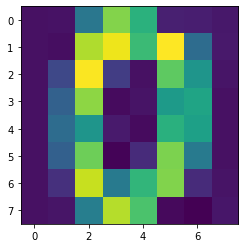

In [66]:
from sklearn.datasets import load_digits
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

model = IsolationForest(random_state=0, contamination=0.03)
model.fit(X)
not_outliers = model.predict(X) == 1
X = X[not_outliers]
y = y[not_outliers]

# PCA pour visualier les donneés

# IMPORTANT

# Il faut standardiser les données pour PCA
# A utlier sur des variables continues et non des one hot par exemple
# Pas efficase sur des datasets non-linéaires

# model = PCA(n_components=2)
# X_reduced = model.fit_transform(X)
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
# plt.colorbar()

# PCA reduction de dimension
model = PCA(n_components=38)
# OU DIRECTEMENT LE POURCENTAGE
# model = PCA(n_components=0.98)

X_reduced = model.fit_transform(X)

# Pour trouver combien mettre dans n_components
# np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.985)

X_recoverd = model.inverse_transform(X_reduced)
plt.imshow(X_recoverd[0].reshape((8,8)))

In [78]:
# Ensemble learning

# Bagging, Boosting et stacking

# Bagging quand overfiting
# Boosting quand pas beacuoup de score
# Stacking quand beacuoup de model different a assembler plus efficace mais plus lent

# Les ensemble sont valable en tant que classifier et regresseur

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Bagging

model = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100)

# model.fit(X_train, y_train)
# model.score(X_test, y_test)

model = RandomForestClassifier(n_estimators=500, max_depth=10)

model.fit(X_train, y_train)
model.score(X_test, y_test)

# Boosting

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Stacking

from sklearn.ensemble import StackingClassifier

# model = StackingClassifier([('M1', model1),('M2', model2),('M3', model3)], final_estimator=KNeighborsClassifier())
# model.fit(X_train, y_train)
# model.score(X_test, y_test)



0.88